In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import time
import os
import nltk
import plotly.express as px
from nltk.sentiment import SentimentIntensityAnalyzer
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

In [2]:
ba_reviews_en = pd.read_csv('../generated/ba_reviews_experts_en.csv')

In [3]:
rb_reviews_en = pd.read_csv('../generated/rb_reviews_experts_en.csv')

# BeerAdvocate

In [ ]:
analyzer = SentimentIntensityAnalyzer()

def analyze_and_classify_sentiment(text):
    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']
    if compound_score >= 0.05:
        sentiment_label = "positive"
    elif compound_score <= -0.05:
        sentiment_label = "negative"
    else:
        sentiment_label = "neutral"
    return scores, sentiment_label

sentiment_results = ba_reviews_en["text"].apply(analyze_and_classify_sentiment)
ba_reviews_en["sentiment_scores"] = sentiment_results.apply(lambda x: x[0])  
ba_reviews_en["sentiment_label"] = sentiment_results.apply(lambda x: x[1])
ba_reviews_en["sentiment_scores"] = ba_reviews_en["sentiment_scores"].astype(str)


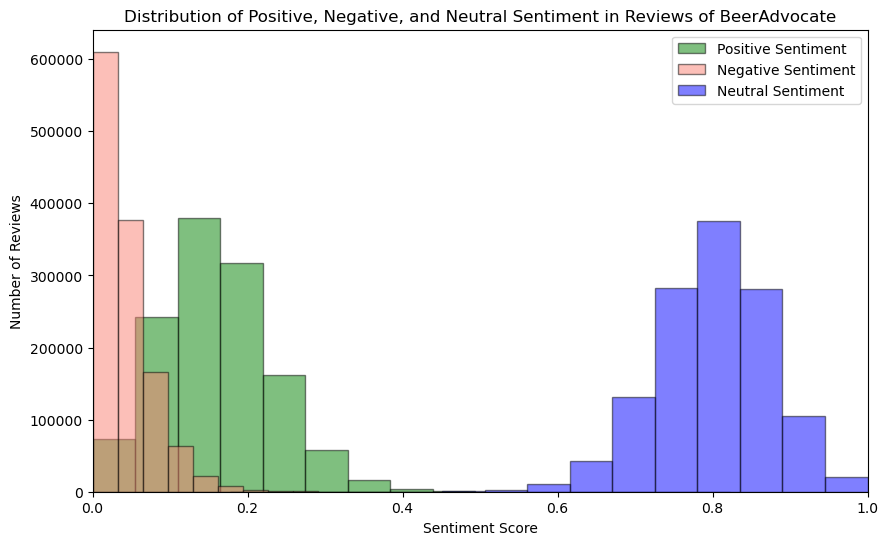

In [28]:
ba_reviews_en["positive_sentiment"] = ba_reviews_en["sentiment_scores"].apply(eval).apply(lambda x: x['pos'])
ba_reviews_en["negative_sentiment"] = ba_reviews_en["sentiment_scores"].apply(eval).apply(lambda x: x['neg'])
ba_reviews_en["neutral_sentiment"] = ba_reviews_en["sentiment_scores"].apply(eval).apply(lambda x: x['neu'])

plt.figure(figsize=(10, 6))
plt.hist(
    ba_reviews_en["positive_sentiment"], bins=15, alpha=0.5, edgecolor='black', label="Positive Sentiment", color='green'
)
plt.hist(
    ba_reviews_en["negative_sentiment"], bins=15, alpha=0.5, edgecolor='black', label="Negative Sentiment", color='salmon'
)
plt.hist(
    ba_reviews_en["neutral_sentiment"], bins=15, alpha=0.5, edgecolor='black', label="Neutral Sentiment", color='blue'
)
plt.xlim([0, 1])
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Positive, Negative, and Neutral Sentiment in Reviews of BeerAdvocate")
plt.legend()
plt.show()

The majority of negative sentiment scores are heavily concentrated near 0.0. This indicates that most reviews on BeerAdvocate have very little proportion of negative tones, with only a small portion registering as somewhat negative (scores between ~0.05 and 0.1). T

Positive sentiment scores are spread out primarily between 0.1 and 0.3, with peaks at around 0.1–0.2.
This suggests that many reviews show mildly positive sentiment, but strong positivity is less common (no significant scores above ~0.3). Compared to negative sentiment, the distribution of positive sentiment is broader and more significant in volume.

Neutral sentiment scores are significantly higher than both positive and negative scores.The distribution clusters tightly between 0.6 and 0.9, indicating that a large number of reviews are identified as having a neutral sentiment score (a large proportion of neutral words). We can see that the review are still being quite descriptive, with a small proportion of the reviews being considered clearly positive or negative.

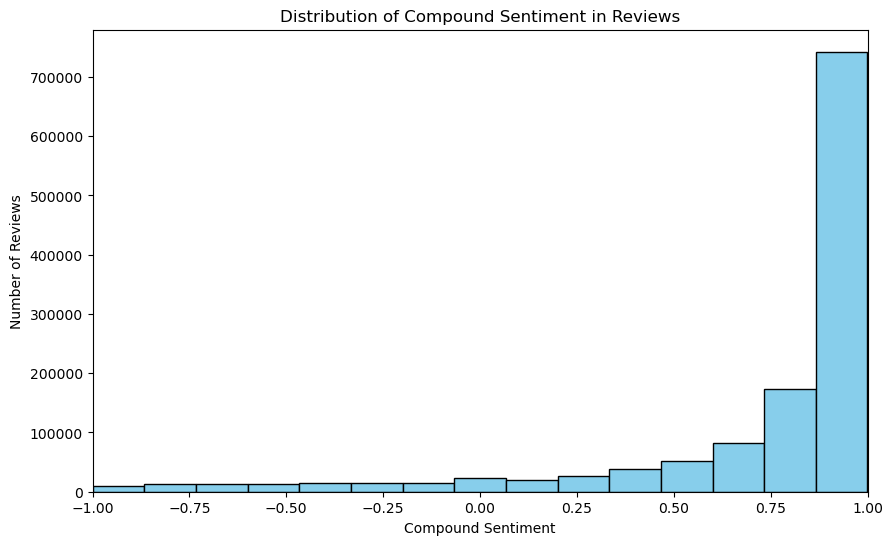

In [8]:
ba_reviews_en["compound_sentiment"] = ba_reviews_en["sentiment_scores"].apply(eval).apply(lambda x: x['compound'])

plt.figure(figsize=(10, 6))
plt.hist(ba_reviews_en["compound_sentiment"], bins=15, edgecolor='black', color='skyblue')
plt.xlim([-1, 1])
plt.xlabel("Compound Sentiment")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Compound Sentiment in Reviews")
plt.show()

The graph shows a strong positive skew in the distribution of compound sentiment scores, with most reviews concentrated near 1.0 (highly positive sentiment). Negative reviews, represented by scores closer to -1.0, are extremely rare, while neutral reviews near 0.0 are also minimal. There is a gradual increase in the number of reviews as the sentiment becomes more positive, and overall, the data indicates a clear positive sentiment bias.

                   count  percentage
sentiment_label                     
positive         1138463       91.03
negative           94346        7.54
neutral            17865        1.43


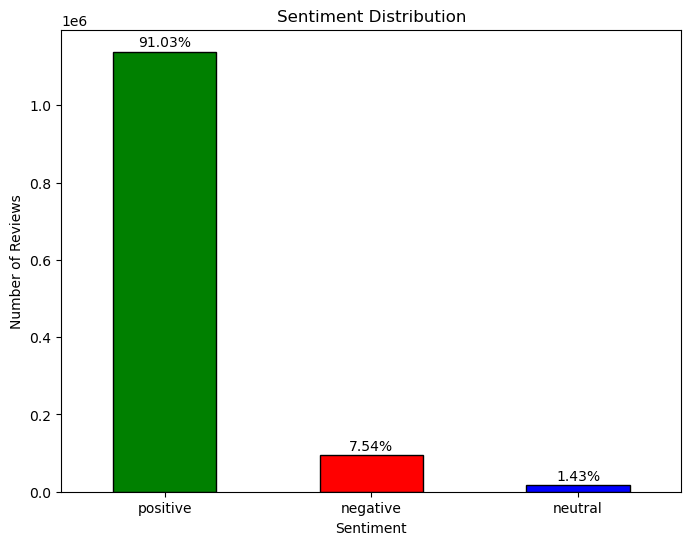

In [9]:
sentiment_counts = ba_reviews_en["sentiment_label"].value_counts()
total_reviews = sentiment_counts.sum()
sentiment_percentages = (sentiment_counts / total_reviews * 100).round(2)

sentiment_analysis = pd.DataFrame({
    "count": sentiment_counts,
    "percentage": sentiment_percentages
})

print(sentiment_analysis)

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind="bar", color=["green", "red", "blue"], edgecolor="black")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)

for index, value in enumerate(sentiment_counts):
    percentage = sentiment_percentages.iloc[index]
    plt.text(index, value + total_reviews * 0.01, f"{percentage}%", ha="center", fontsize=10)

plt.show()

This follows what we could see on the compound sentiment graph with 91.03% of reviews classified as positive. This large majority indicates that users tend to express favorable or appreciative opinions in their reviews. The dominance of positive sentiment aligns with common patterns observed in online review platforms, where users are more likely to share positive experiences.
7.54% of reviews are classified as negative.
The low percentage of negative sentiment highlights that users seldom express strong criticism.
This could reflect platform culture or reviewer behavior, where negative feedback is minimized.
Only 1.43% of reviews are classified as neutral.
The minimal proportion of neutral sentiment suggests that reviews on this platform are typically opinionated (leaning towards positive or negative), with fewer instances of balanced or neutral language.

The chart highlights a strong positive sentiment among reviews, with minimal neutral content and limited negative feedback. This chart focuses on overall sentiment classification (positive/negative/neutral), unlike previous histograms that explored sentiment scores more granularly.

# RateBeer

In [10]:
analyzer = SentimentIntensityAnalyzer()

def analyze_and_classify_sentiment(text):
    scores = analyzer.polarity_scores(text) 
    compound_score = scores['compound']
    if compound_score >= 0.05:
        sentiment_label = "positive"
    elif compound_score <= -0.05:
        sentiment_label = "negative"
    else:
        sentiment_label = "neutral"
    return scores, sentiment_label

sentiment_results = rb_reviews_en["text"].apply(analyze_and_classify_sentiment)
rb_reviews_en["sentiment_scores"] = sentiment_results.apply(lambda x: x[0])  
rb_reviews_en["sentiment_label"] = sentiment_results.apply(lambda x: x[1])
rb_reviews_en["sentiment_scores"] = rb_reviews_en["sentiment_scores"].astype(str)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,language,sentiment_scores,sentiment_label
0,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2015-10-23 10:00:00,kevnic2008,122778,2,4,2,4,7,1.9,Many thanks for this beer to Erzengel. Pours l...,en,"{'neg': 0.078, 'neu': 0.704, 'pos': 0.219, 'co...",positive
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2015-10-12 10:00:00,Beerhunter111,227834,2,3,2,3,9,1.9,Many thanks to Erzengel for sharing! Pours cle...,en,"{'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'comp...",positive
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2015-10-07 10:00:00,Erzengel,83106,4,5,4,5,8,2.6,Many thanks to Travlr for this can! Grainy no...,en,"{'neg': 0.232, 'neu': 0.589, 'pos': 0.179, 'co...",negative
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2014-05-29 10:00:00,Lowenbrau,37316,3,5,2,3,7,2.0,"330ml bottle. 29-05-2014.From Gabon, courtesy ...",en,"{'neg': 0.16, 'neu': 0.551, 'pos': 0.289, 'com...",positive
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2009-06-18 10:00:00,Cletus,17111,4,4,2,4,8,2.2,Pours yellow with a large white head. Smells ...,en,"{'neg': 0.0, 'neu': 0.831, 'pos': 0.169, 'comp...",positive


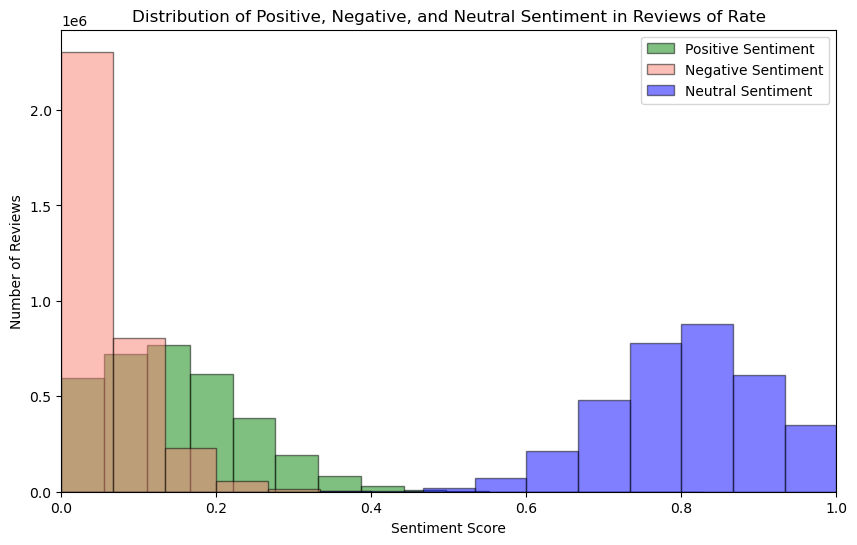

In [12]:
rb_reviews_en["positive_sentiment"] = rb_reviews_en["sentiment_scores"].apply(eval).apply(lambda x: x['pos'])
rb_reviews_en["negative_sentiment"] = rb_reviews_en["sentiment_scores"].apply(eval).apply(lambda x: x['neg'])
rb_reviews_en["neutral_sentiment"] = rb_reviews_en["sentiment_scores"].apply(eval).apply(lambda x: x['neu'])

plt.figure(figsize=(10, 6))
plt.hist(
    rb_reviews_en["positive_sentiment"], bins=15, alpha=0.5, edgecolor='black', label="Positive Sentiment", color='green'
)
plt.hist(
    rb_reviews_en["negative_sentiment"], bins=15, alpha=0.5, edgecolor='black', label="Negative Sentiment", color='salmon'
)
plt.hist(
    rb_reviews_en["neutral_sentiment"], bins=15, alpha=0.5, edgecolor='black', label="Neutral Sentiment", color='blue'
)
plt.xlim([0, 1])
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Positive, Negative, and Neutral Sentiment in Reviews of Rate")
plt.legend()
plt.show()

Again the negative sentiment scores are concentrated close to 0. The vast majority of reviews have a very low negative score, most reviews are not highly negative.

The positive sentiment scores are spread mostly between 0.1 and 0.3, with some occurring slightly higher.There is a noticeable concentration in the low positive range (e.g., 0.1–0.2), but the distribution extends further compared to the negative scores. This indicates that many reviews have some positive sentiment but are not extremely enthusiastic.

The neutral sentiment scores are clearly higher than both positive and negative scores.
Most of the neutral sentiment values cluster between 0.6 and 0.9, showing that many reviews have a large part of neutral tone.

The imbalance between neutral and other sentiment types (positive or negative) might indicate that users often post factual or unenthusiastic reviews rather than strongly emotional ones.

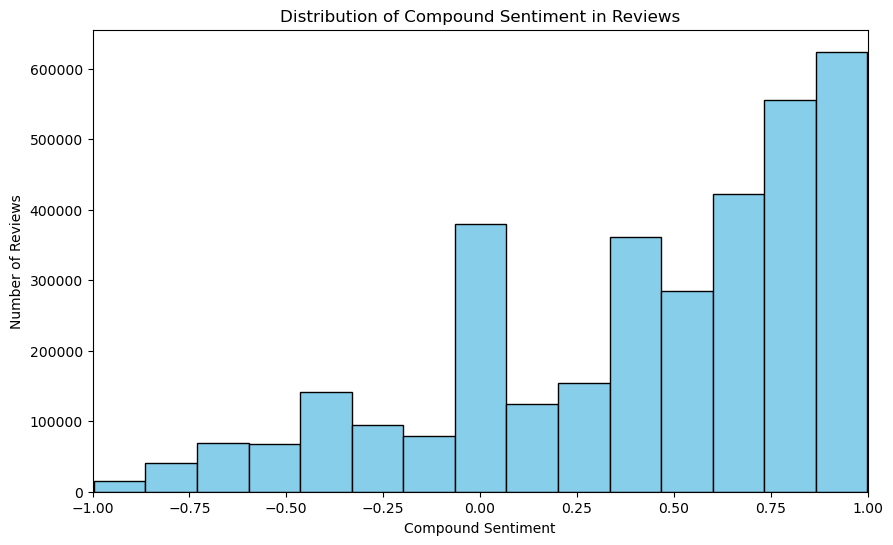

In [13]:
rb_reviews_en["compound_sentiment"] = rb_reviews_en["sentiment_scores"].apply(eval).apply(lambda x: x['compound'])

plt.figure(figsize=(10, 6))
plt.hist(rb_reviews_en["compound_sentiment"], bins=15, edgecolor='black', color='skyblue')
plt.xlim([-1, 1]) 
plt.xlabel("Compound Sentiment")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Compound Sentiment in Reviews")
plt.show()

The distribution indicates that the majority of reviews fall in the positive sentiment range (0.5 to 1.0), with the highest concentration near 1.0. There are also a significant number of reviews with a neutral tone (around 0.0), suggesting a balanced perspective for some users. However, the negative sentiment range (below 0.0) is much less represented, highlighting that strongly negative reviews are relatively rare. Overall, the graph reflects a trend toward positive sentiment, while neutral and negative reviews are far less frequent.

                   count  percentage
sentiment_label                     
positive         2570389       75.31
negative          530411       15.54
neutral           312168        9.15


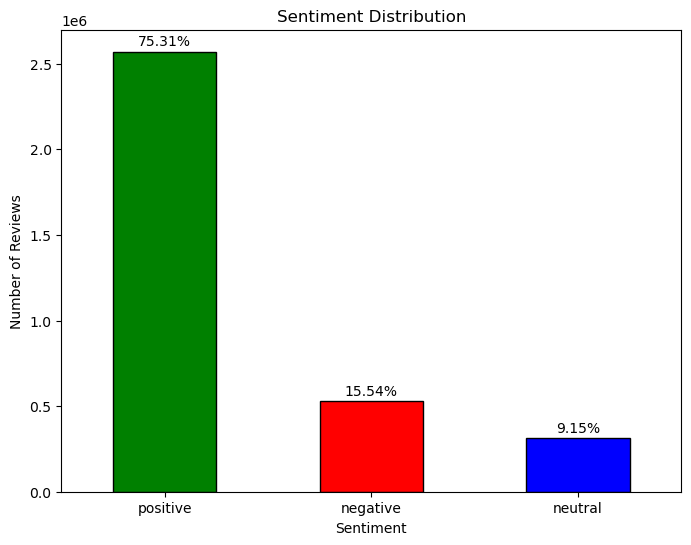

In [14]:
sentiment_counts = rb_reviews_en["sentiment_label"].value_counts()
total_reviews = sentiment_counts.sum()
sentiment_percentages = (sentiment_counts / total_reviews * 100).round(2)

sentiment_analysis = pd.DataFrame({
    "count": sentiment_counts,
    "percentage": sentiment_percentages
})

print(sentiment_analysis)

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind="bar", color=["green", "red", "blue"], edgecolor="black")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)

for index, value in enumerate(sentiment_counts):
    percentage = sentiment_percentages.iloc[index]
    plt.text(index, value + total_reviews * 0.01, f"{percentage}%", ha="center", fontsize=10)

plt.show()

Following what we could see before, majority of reviews (75.31%) are positive, reflecting an highly favorable sentiment among reviewers. Negative reviews make up 15.54%, indicating that a smaller but notable portion of users expressed dissatisfaction. Neutral reviews account for 9.15%, suggesting that a modest group of reviewers maintained a balanced or objective tone. Overall, the data highlights a strong positive bias, with most reviewers leaning toward upbeat and enthusiastic feedback, while negative and neutral sentiments are significantly less common.

# Comparison between both

python(18920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


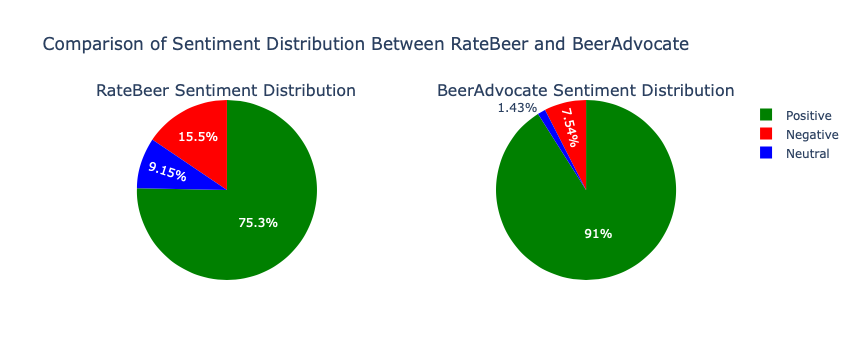

In [36]:
def calculate_sentiment_distribution(df):
    sentiment_counts = df["sentiment_label"].value_counts(normalize=True) * 100
    return {
        "positive": sentiment_counts.get("positive", 0),
        "negative": sentiment_counts.get("negative", 0),
        "neutral": sentiment_counts.get("neutral", 0),
    }

ratebeer_distribution = calculate_sentiment_distribution(rb_reviews_en)
beeradvocate_distribution = calculate_sentiment_distribution(ba_reviews_en)

ratebeer_sizes = [ratebeer_distribution["positive"], ratebeer_distribution["negative"], ratebeer_distribution["neutral"]]
beeradvocate_sizes = [beeradvocate_distribution["positive"], beeradvocate_distribution["negative"], beeradvocate_distribution["neutral"]]
labels = ["Positive", "Negative", "Neutral"]

fig = make_subplots(
    rows=1, cols=2, 
    specs=[[{"type": "pie"}, {"type": "pie"}]], 
    subplot_titles=["RateBeer Sentiment Distribution", "BeerAdvocate Sentiment Distribution"]
)

fig.add_trace(
    go.Pie(
        labels=labels,
        values=ratebeer_sizes,
        name="RateBeer",
        marker=dict(colors=["green", "red", "blue"])
    ),
    row=1, col=1
)

fig.add_trace(
    go.Pie(
        labels=labels,
        values=beeradvocate_sizes,
        name="BeerAdvocate",
        marker=dict(colors=["green", "red", "blue"])
    ),
    row=1, col=2
)

fig.update_layout(
    title_text="Comparison of Sentiment Distribution Between RateBeer and BeerAdvocate",
    showlegend=True
)

output_dir = "../generated/figures"
os.makedirs(output_dir, exist_ok=True)

output_html_file = os.path.join(output_dir, "sentiment_comparison.html")
pio.write_html(fig, file=output_html_file, auto_open=True)

fig.show()

The comparison shows that BeerAdvocate has a significantly higher proportion of positive reviews (91%) compared to RateBeer (75.3%), reflecting a more enthusiastic and celebratory tone among its users. On the other hand, RateBeer has a noticeably larger share of negative reviews (15.5%) compared to BeerAdvocate’s 7.54%, suggesting that RateBeer reviewers are more critical and willing to express dissatisfaction. Neutral reviews are also more prevalent on RateBeer (9.15%) compared to BeerAdvocate’s minimal 1.43%, indicating that RateBeer users provide more balanced or factual feedback.

python(21143) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Interactive graph saved as: ../generated/figures/sentiment_distribution_comparison_2.html


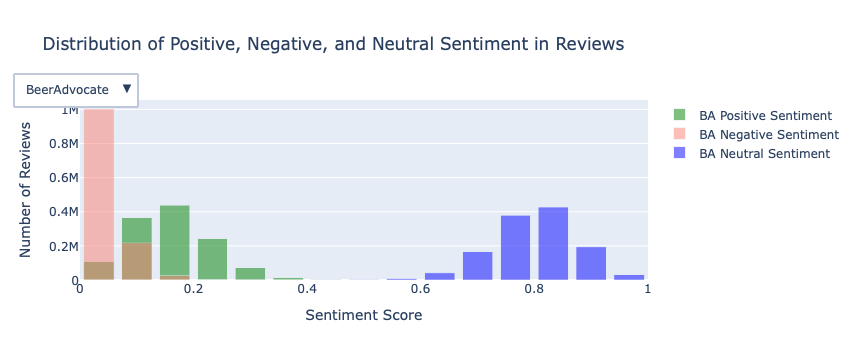

In [43]:
bins = np.linspace(0, 1, 16)

ba_positive_counts, _ = np.histogram(ba_reviews_en["positive_sentiment"], bins=bins)
ba_negative_counts, _ = np.histogram(ba_reviews_en["negative_sentiment"], bins=bins)
ba_neutral_counts, _ = np.histogram(ba_reviews_en["neutral_sentiment"], bins=bins)

rb_positive_counts, _ = np.histogram(rb_reviews_en["positive_sentiment"], bins=bins)
rb_negative_counts, _ = np.histogram(rb_reviews_en["negative_sentiment"], bins=bins)
rb_neutral_counts, _ = np.histogram(rb_reviews_en["neutral_sentiment"], bins=bins)

bin_centers = (bins[:-1] + bins[1:]) / 2

fig = go.Figure()

fig.add_trace(go.Bar(x=bin_centers, y=ba_positive_counts, name="BA Positive Sentiment",
                     marker_color="green", opacity=0.5))
fig.add_trace(go.Bar(x=bin_centers, y=ba_negative_counts, name="BA Negative Sentiment",
                     marker_color="salmon", opacity=0.5))
fig.add_trace(go.Bar(x=bin_centers, y=ba_neutral_counts, name="BA Neutral Sentiment",
                     marker_color="blue", opacity=0.5))

fig.add_trace(go.Bar(x=bin_centers, y=rb_positive_counts, name="RB Positive Sentiment",
                     marker_color="green", opacity=0.5, visible=False))
fig.add_trace(go.Bar(x=bin_centers, y=rb_negative_counts, name="RB Negative Sentiment",
                     marker_color="salmon", opacity=0.5, visible=False))
fig.add_trace(go.Bar(x=bin_centers, y=rb_neutral_counts, name="RB Neutral Sentiment",
                     marker_color="blue", opacity=0.5, visible=False))

fig.update_layout(
    title="Distribution of Positive, Negative, and Neutral Sentiment in Reviews",
    xaxis_title="Sentiment Score",
    yaxis_title="Number of Reviews",
    xaxis=dict(range=[0, 1]),
    barmode="overlay",
    updatemenus=[{
        "buttons": [
            {"label": "BeerAdvocate",
             "method": "update",
             "args": [{"visible": [True, True, True, False, False, False]},  
                      {"title": "Distribution of Positive, Negative, and Neutral Sentiment in Reviews of BeerAdvocate"}]},
            {"label": "RateBeer",
             "method": "update",
             "args": [{"visible": [False, False, False, True, True, True]},  
                      {"title": "Distribution of Positive, Negative, and Neutral Sentiment in Reviews of RateBeer"}]}
        ],
        "direction": "down",
        "showactive": True,
        "x": 0.1,
        "y": 1.15
    }]
)

output_dir = "../generated/figures"
os.makedirs(output_dir, exist_ok=True)

output_html_file = os.path.join(output_dir, "sentiment_distribution_comparison_2.html")
pio.write_html(fig, file=output_html_file, auto_open=True)
fig.show()

If we compare both datasets we see that they have a similar distribution of positive, negative and neutral score. 
The majority of reviews have a negative sentiment score of 0, positive sentiment scores are spread out but most concentrated between 0.1 and 0.3, showing that many reviews are mildly to moderately positive. The neutral sentiment score is the most prominent in the 0.6 to 0.8 range.
This shows a clear group of reviewers providing balanced or factual feedback without leaning heavily positive or negative.

Finally by comparing this with the pie chart we can see that a high neu score does not necessarily mean the review is entirely neutral in tone. It simply suggests that the text contains a significant amount of neutral content (e.g., factual descriptions or non-emotional language).
The sentiment label (positive, negative, neutral) is determined based on the compound score:
Compound score ≥ 0.05 → Positive
Compound score ≤ -0.05 → Negative
-0.05 < Compound score < 0.05 → Neutral
Even if a review has a high neu score, it might still have a sufficiently high compound score to be labeled as positive or negative.

Many reviews may have a mix of neutral and emotional language.
A review like "The beer has a smooth texture and a pleasant taste" might have a high neu score for its descriptive language but still register a high compound score because of positive words like "smooth" and "pleasant." Similarly, "The beer lacks flavor and is quite bland" may also have a high neu score for its descriptive content but a low compound score due to negative words like "lacks" and "bland."

Finally the compound score threshold for a "neutral" label (-0.05 < compound < 0.05) is narrow, so most reviews with high neu scores still fall into the positive or negative categories based on small emotional signals. Many reviews may be fact-heavy or descriptive but still contain enough emotional cues to lean positive or negative in their compound score.This could suggest that reviewers tend to describe beers objectively (e.g., texture, aroma, flavor) while subtly expressing a sentiment.